In [1]:
%%time

import os
import warnings
import numpy as np

####################################################
import liberate
from liberate import fhe
from liberate.utils.helpers import absmax_error, check_errors
from liberate.fhe import presets
####################################################
from matplotlib import pyplot as plt
from tqdm import tqdm


warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

CPU times: user 3.74 s, sys: 10.8 s, total: 14.5 s
Wall time: 2.01 s


# 1. Generate CKKS_ENGINE

In [2]:
params = presets.params["silver"]
engine = fhe.ckks_engine(verbose=True, **params)
secret_key = engine.create_secret_key()
public_key = engine.create_public_key(sk=secret_key)

[2023-11-14 13:22:44.398608] I have received the context:


I have received inputs:
        buffer_bit_length		= 62
        scale_bits			= 40
        logN				= 15
        N				= 32,768
        Number of special primes	= 2
        Number of scales		= 16
        Cache folder			= '/home/hanyul/.pyenv/versions/liberate/lib/python3.11/site-packages/liberate/fhe/cache/resources'
        Security bits			= 128
        Quantum security model		= post_quantum
        Security sampling distribution	= uniform
        Number of message bits		= 60
        In total I will be using '821' bits out of available maximum '829' bits.
        And is it secured?		= True
My RNS primes are [1099510054913, 1099515691009, 1099507695617, 1099516280833, 1099506515969, 1099520606209, 1099504549889, 1099523555329, 1099503894529, 1099527946241, 1099503370241, 1099529060353, 1099498258433, 1099531223041, 1099469684737, 1099532009473, 1152921504606584833, 1152921504598720513, 1152921504597016577].
[2023-11-14 13:22:44.3

# 2. Add / Substract 

In [3]:
%%time

# generate example data
a = engine.example(amin = -255, amax = 255)
b = engine.example(amin = -255, amax = 255)

print("-"*50)
level = 0
for level in range(engine.num_levels):
    # # encode
    # pt_a = engine.encode(m=a, level=level)
    # pt_b = engine.encode(m=b, level=level)

    # # encrypt
    # ct_a = engine.encrypt(pt=pt_a, pk=public_key, level=level)
    # ct_b = engine.encrypt(pt=pt_b, pk=public_key, level=level)

    ct_a = engine.encorypt(a, pk=public_key, level=level)
    ct_b = engine.encorypt(b, pk=public_key, level=level)
    
    # Add / Sub
    ct_add = engine.cc_add(a=ct_a, b=ct_b)
    ct_sub = engine.cc_subtract(a=ct_a, b=ct_b)

    c_add = a + b
    c_sub = a - b

    # pt_add = engine.decrypt(ct=ct_add, sk=secret_key)
    # pt_sub = engine.decrypt(ct=ct_sub, sk=secret_key)

    # m_add = engine.decode(m=pt_add, level=level)
    # m_sub = engine.decode(m=pt_sub, level=level)
    m_add = engine.decrode(ct_add, sk=secret_key)
    m_sub = engine.decrode(ct_sub, sk=secret_key)

    add_err = absmax_error(c_add, m_add)
    sub_err = absmax_error(c_sub, m_sub)
    print(f'At level {level:2d}, add error was {add_err:.2e},\n'
          f'\t and sub error was {sub_err:.2e}.\t')
    print("-"*50)

--------------------------------------------------
At level  0, add error was 2.98e-10+9.52e-09j,
	 and sub error was 2.94e-10+9.45e-09j.	
--------------------------------------------------
At level  1, add error was 2.90e-10+9.43e-09j,
	 and sub error was 2.90e-10+9.51e-09j.	
--------------------------------------------------
At level  2, add error was 3.29e-10+9.61e-09j,
	 and sub error was 3.37e-10+9.45e-09j.	
--------------------------------------------------
At level  3, add error was 3.28e-10+9.50e-09j,
	 and sub error was 2.97e-10+9.47e-09j.	
--------------------------------------------------
At level  4, add error was 3.20e-10+9.48e-09j,
	 and sub error was 3.08e-10+9.55e-09j.	
--------------------------------------------------
At level  5, add error was 3.14e-10+9.37e-09j,
	 and sub error was 2.95e-10+9.61e-09j.	
--------------------------------------------------
At level  6, add error was 3.12e-10+9.38e-09j,
	 and sub error was 3.12e-10+9.43e-09j.	
---------------------------

err add


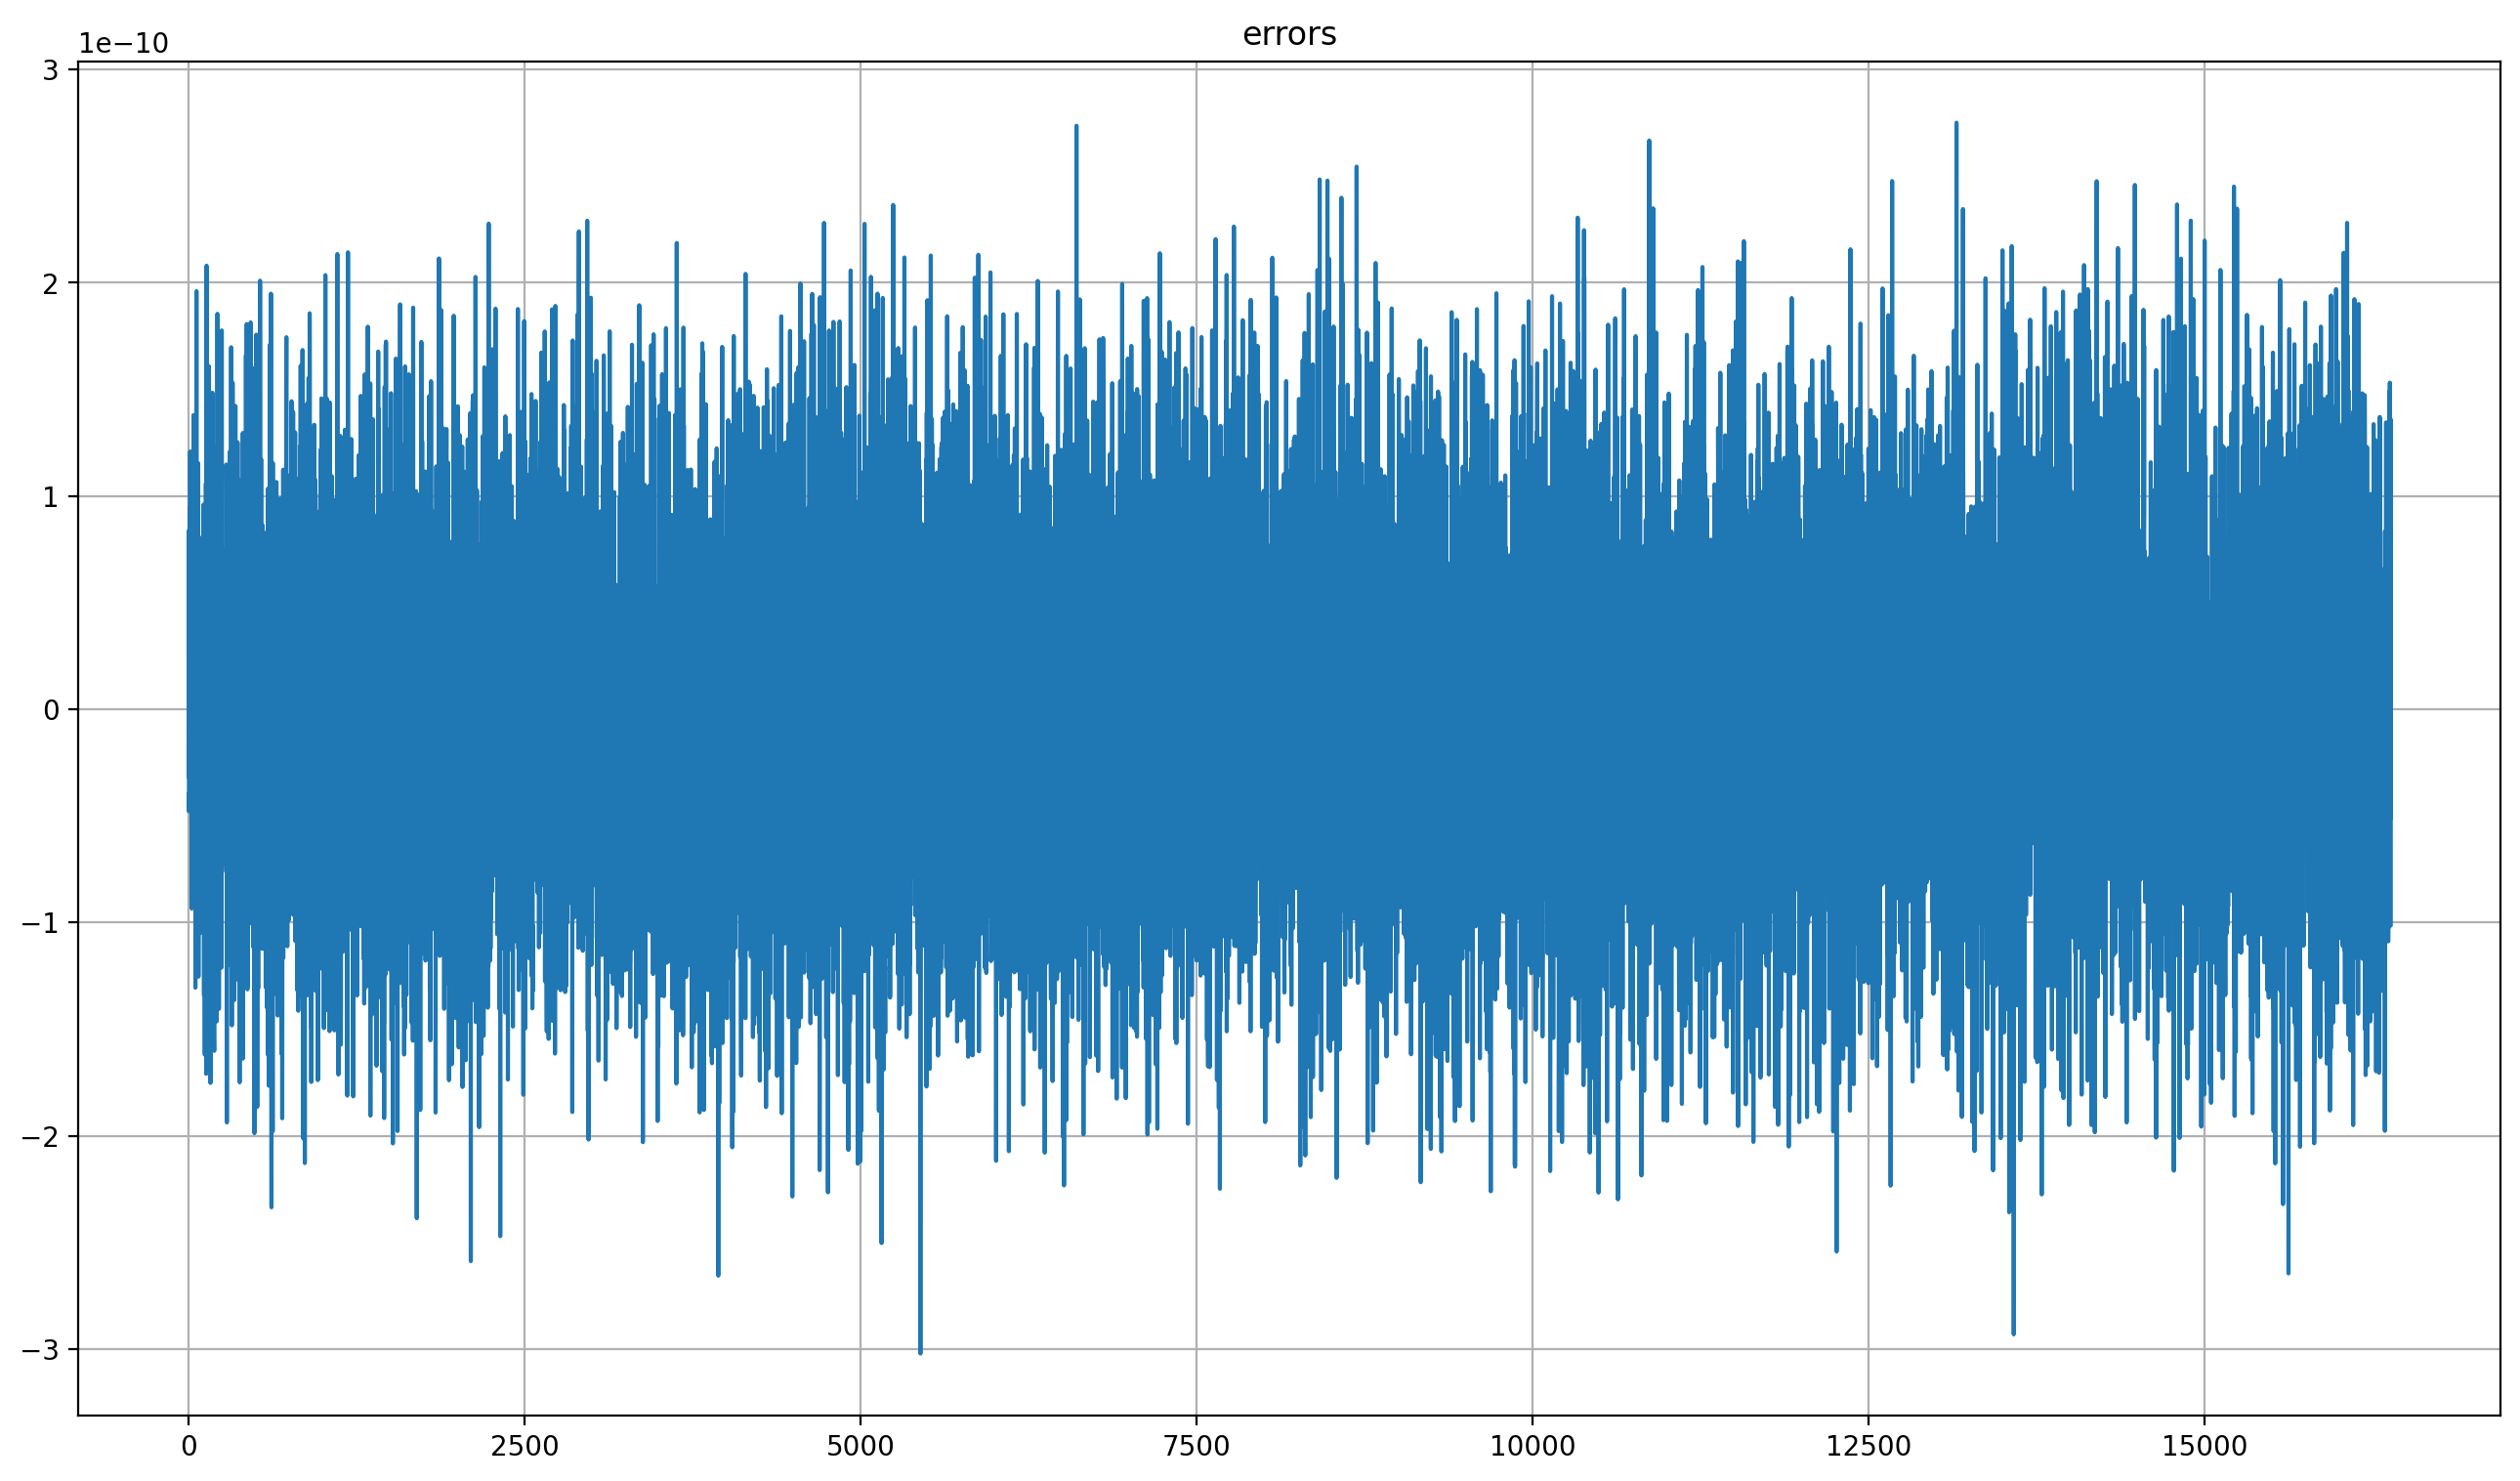

    -369.7200510687 |     -369.7200510687 |  -0.0000000000
     -33.9799495274 |      -33.9799495274 |  -0.0000000000
    -298.8903890651 |     -298.8903890651 |  -0.0000000000
     290.7599831127 |      290.7599831128 |   0.0000000001
    -312.0472822731 |     -312.0472822731 |  -0.0000000000
     266.9072775100 |      266.9072775100 |  -0.0000000000
     -29.0943651499 |      -29.0943651499 |  -0.0000000000
    -305.5238783700 |     -305.5238783700 |  -0.0000000000
     179.2212413383 |      179.2212413384 |   0.0000000001
    -109.1491778557 |     -109.1491778556 |   0.0000000001
mean	=	-0.000000000000786-0.000000000001216j
std	=	0.000000000134949
max err	=	0.000000009582889
min err	=	0.000000000000145

err sub


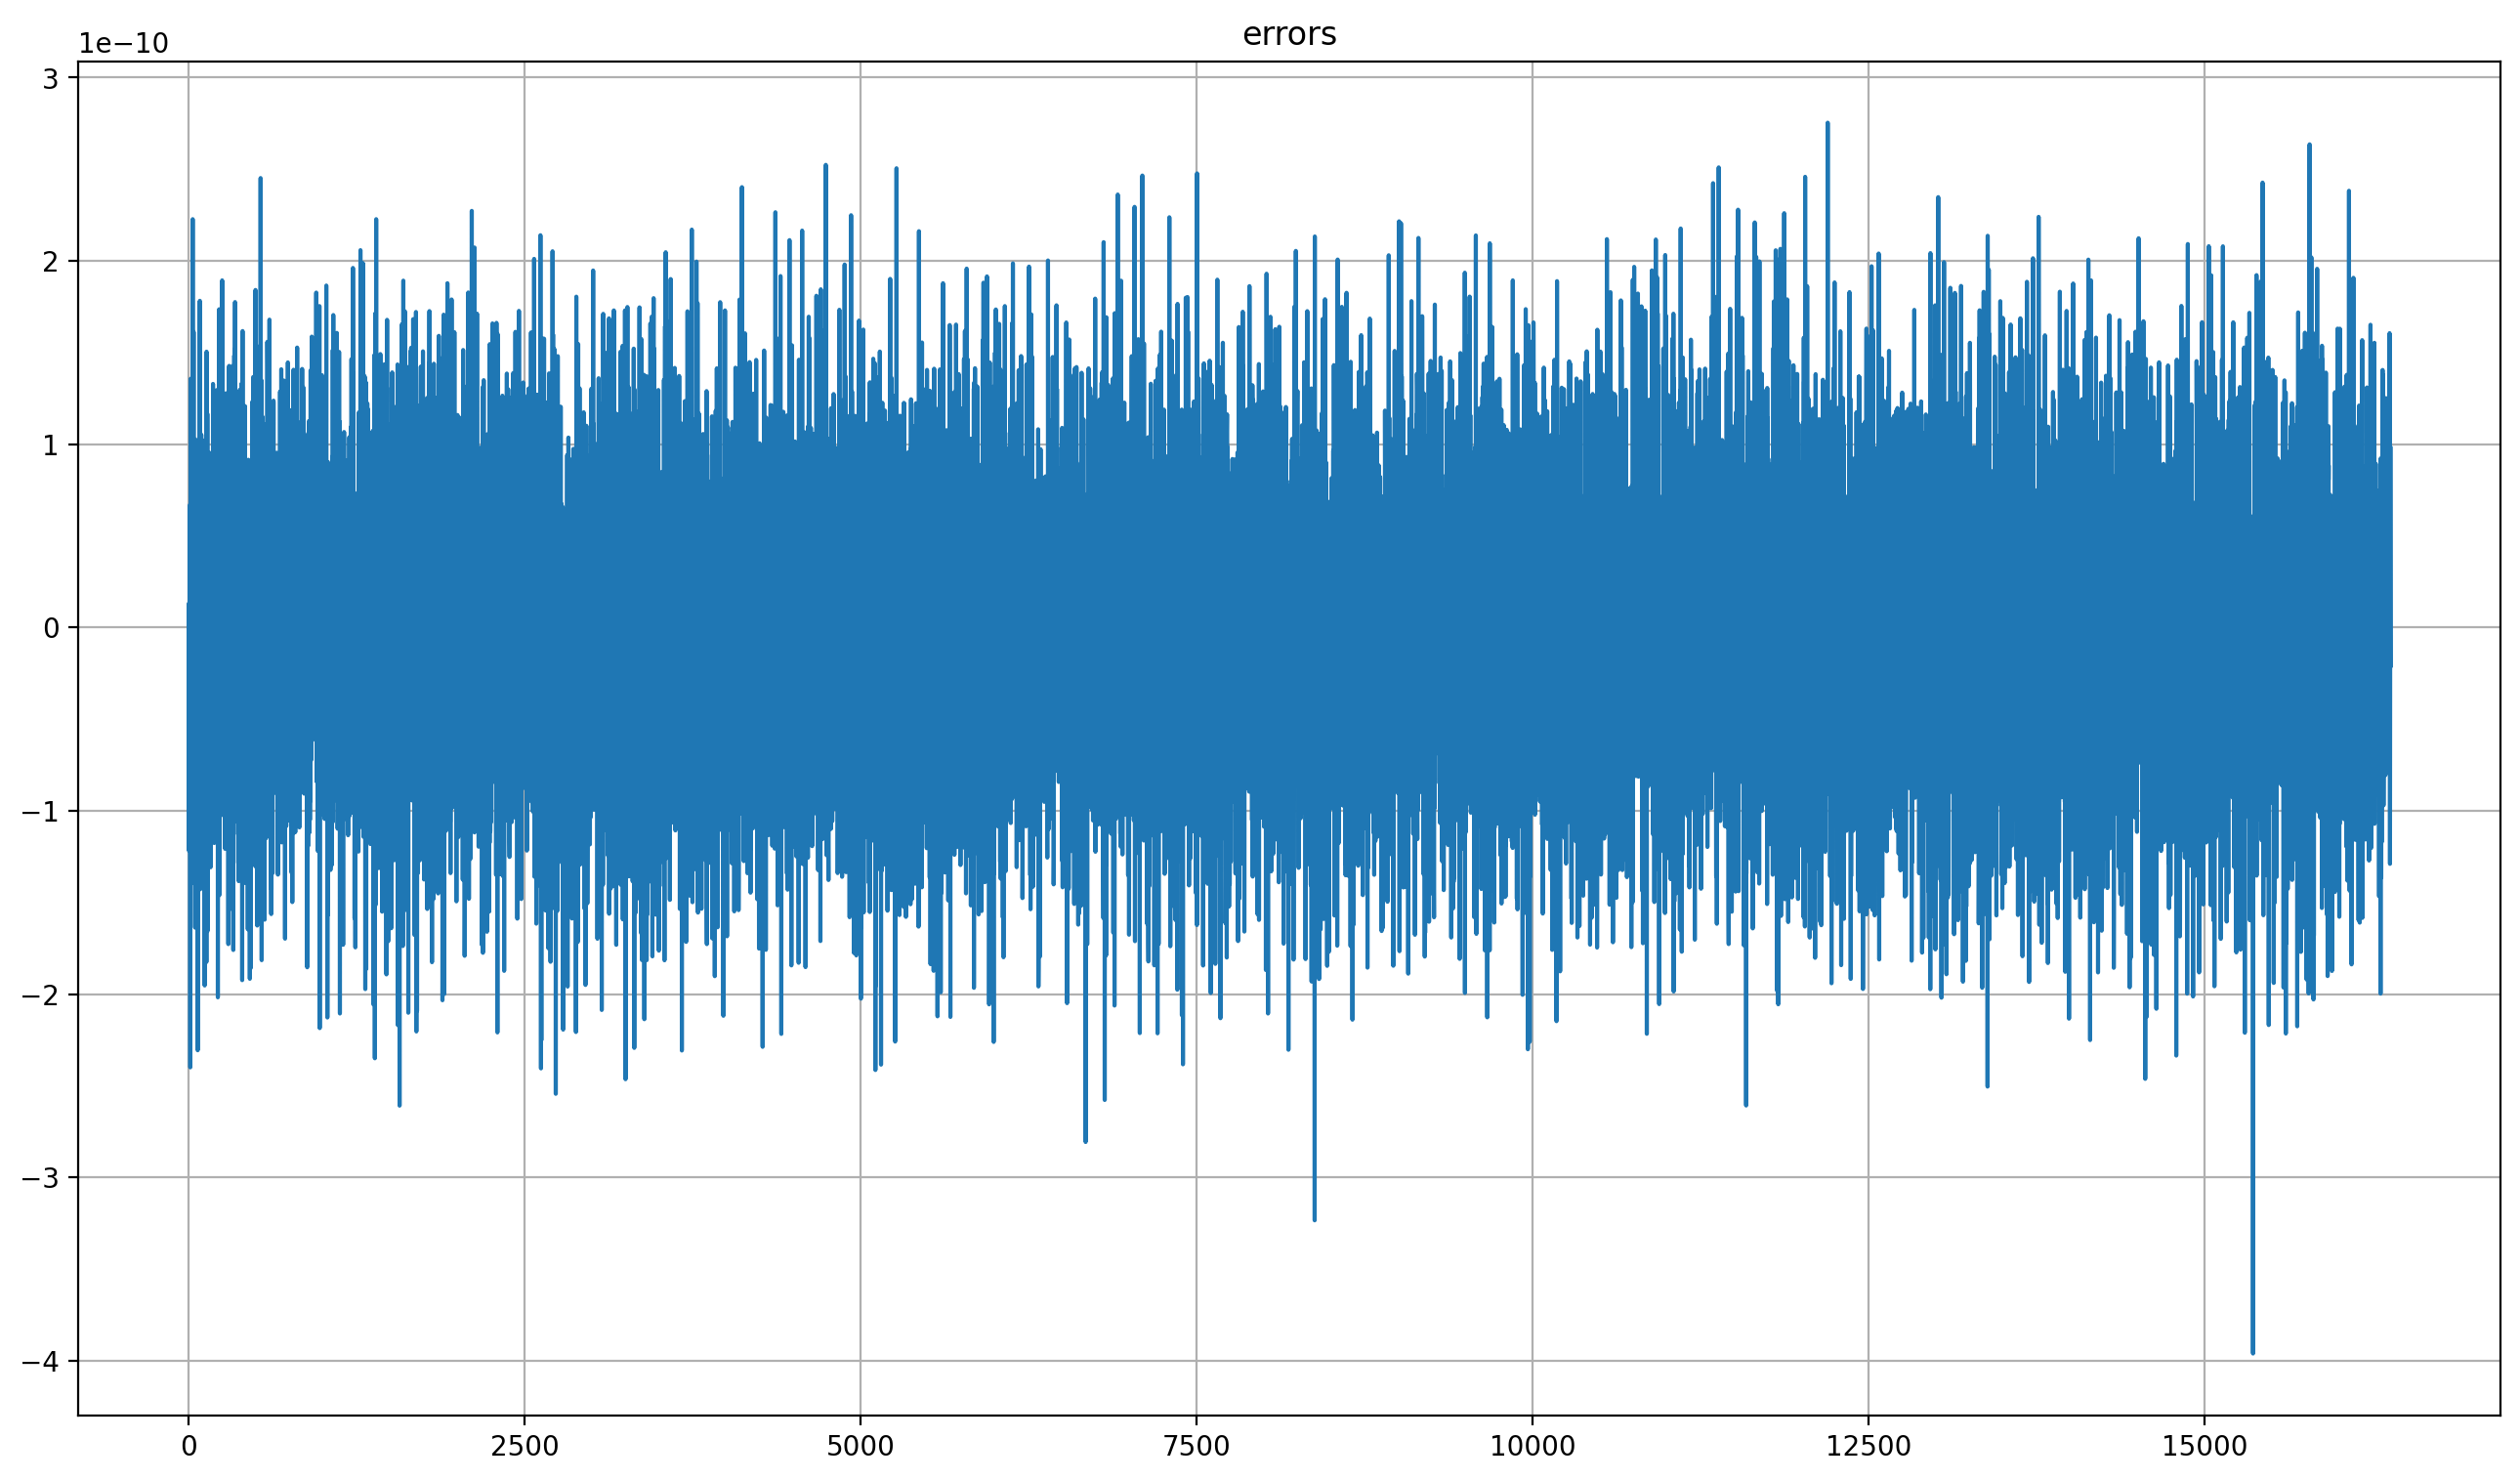

     -75.0251141351 |      -75.0251141352 |  -0.0000000001
     475.6967260490 |      475.6967260490 |   0.0000000000
    -198.1668847631 |     -198.1668847632 |  -0.0000000001
    -203.3626698077 |     -203.3626698077 |   0.0000000000
      71.5659636265 |       71.5659636265 |  -0.0000000000
      15.1002735356 |       15.1002735356 |   0.0000000000
     -28.1487513279 |      -28.1487513280 |  -0.0000000001
     -31.1758419848 |      -31.1758419848 |  -0.0000000000
      36.3667885051 |       36.3667885051 |  -0.0000000000
    -277.6695086145 |     -277.6695086144 |   0.0000000001
mean	=	-0.000000000001312-0.000000000000488j
std	=	0.000000000134169
max err	=	0.000000009328898
min err	=	0.000000000001365


In [4]:
print("err add")
check_errors(c_add, m_add)
print()
print("="*100)
print("err sub")
check_errors(c_sub, m_sub)

----
----
----
----

# 2. Multiplication

In [5]:
# Mult 1 level.

params = presets.params["silver"]
engine = fhe.ckks_engine(verbose=True, **params)

sk = engine.create_secret_key()
pk = engine.create_public_key(sk)
evk = engine.create_evk(sk)

[2023-11-14 13:22:48.360191] I have received the context:


I have received inputs:
        buffer_bit_length		= 62
        scale_bits			= 40
        logN				= 15
        N				= 32,768
        Number of special primes	= 2
        Number of scales		= 16
        Cache folder			= '/home/hanyul/.pyenv/versions/liberate/lib/python3.11/site-packages/liberate/fhe/cache/resources'
        Security bits			= 128
        Quantum security model		= post_quantum
        Security sampling distribution	= uniform
        Number of message bits		= 60
        In total I will be using '821' bits out of available maximum '829' bits.
        And is it secured?		= True
My RNS primes are [1099510054913, 1099515691009, 1099507695617, 1099516280833, 1099506515969, 1099520606209, 1099504549889, 1099523555329, 1099503894529, 1099527946241, 1099503370241, 1099529060353, 1099498258433, 1099531223041, 1099469684737, 1099532009473, 1152921504606584833, 1152921504598720513, 1152921504597016577].
[2023-11-14 13:22:48.3

>> At level :  0,
    		mult error was 5.02e-08+4.51e-08j
>> At level :  1,
    		mult error was 4.71e-08+4.82e-08j
>> At level :  2,
    		mult error was 5.44e-08+5.04e-08j
>> At level :  3,
    		mult error was 5.03e-08+5.75e-08j
>> At level :  4,
    		mult error was 5.12e-08+4.86e-08j
>> At level :  5,
    		mult error was 4.44e-08+6.85e-08j
>> At level :  6,
    		mult error was 4.71e-08+4.85e-08j
>> At level :  7,
    		mult error was 4.36e-08+5.05e-08j
>> At level :  8,
    		mult error was 5.91e-08+4.11e-08j
>> At level :  9,
    		mult error was 4.79e-08+6.87e-08j
>> At level : 10,
    		mult error was 5.01e-08+4.17e-08j
>> At level : 11,
    		mult error was 6.38e-08+4.79e-08j
>> At level : 12,
    		mult error was 4.29e-08+4.91e-08j
>> At level : 13,
    		mult error was 4.41e-08+4.51e-08j
>> At level : 14,
    		mult error was 4.08e-08+4.60e-08j


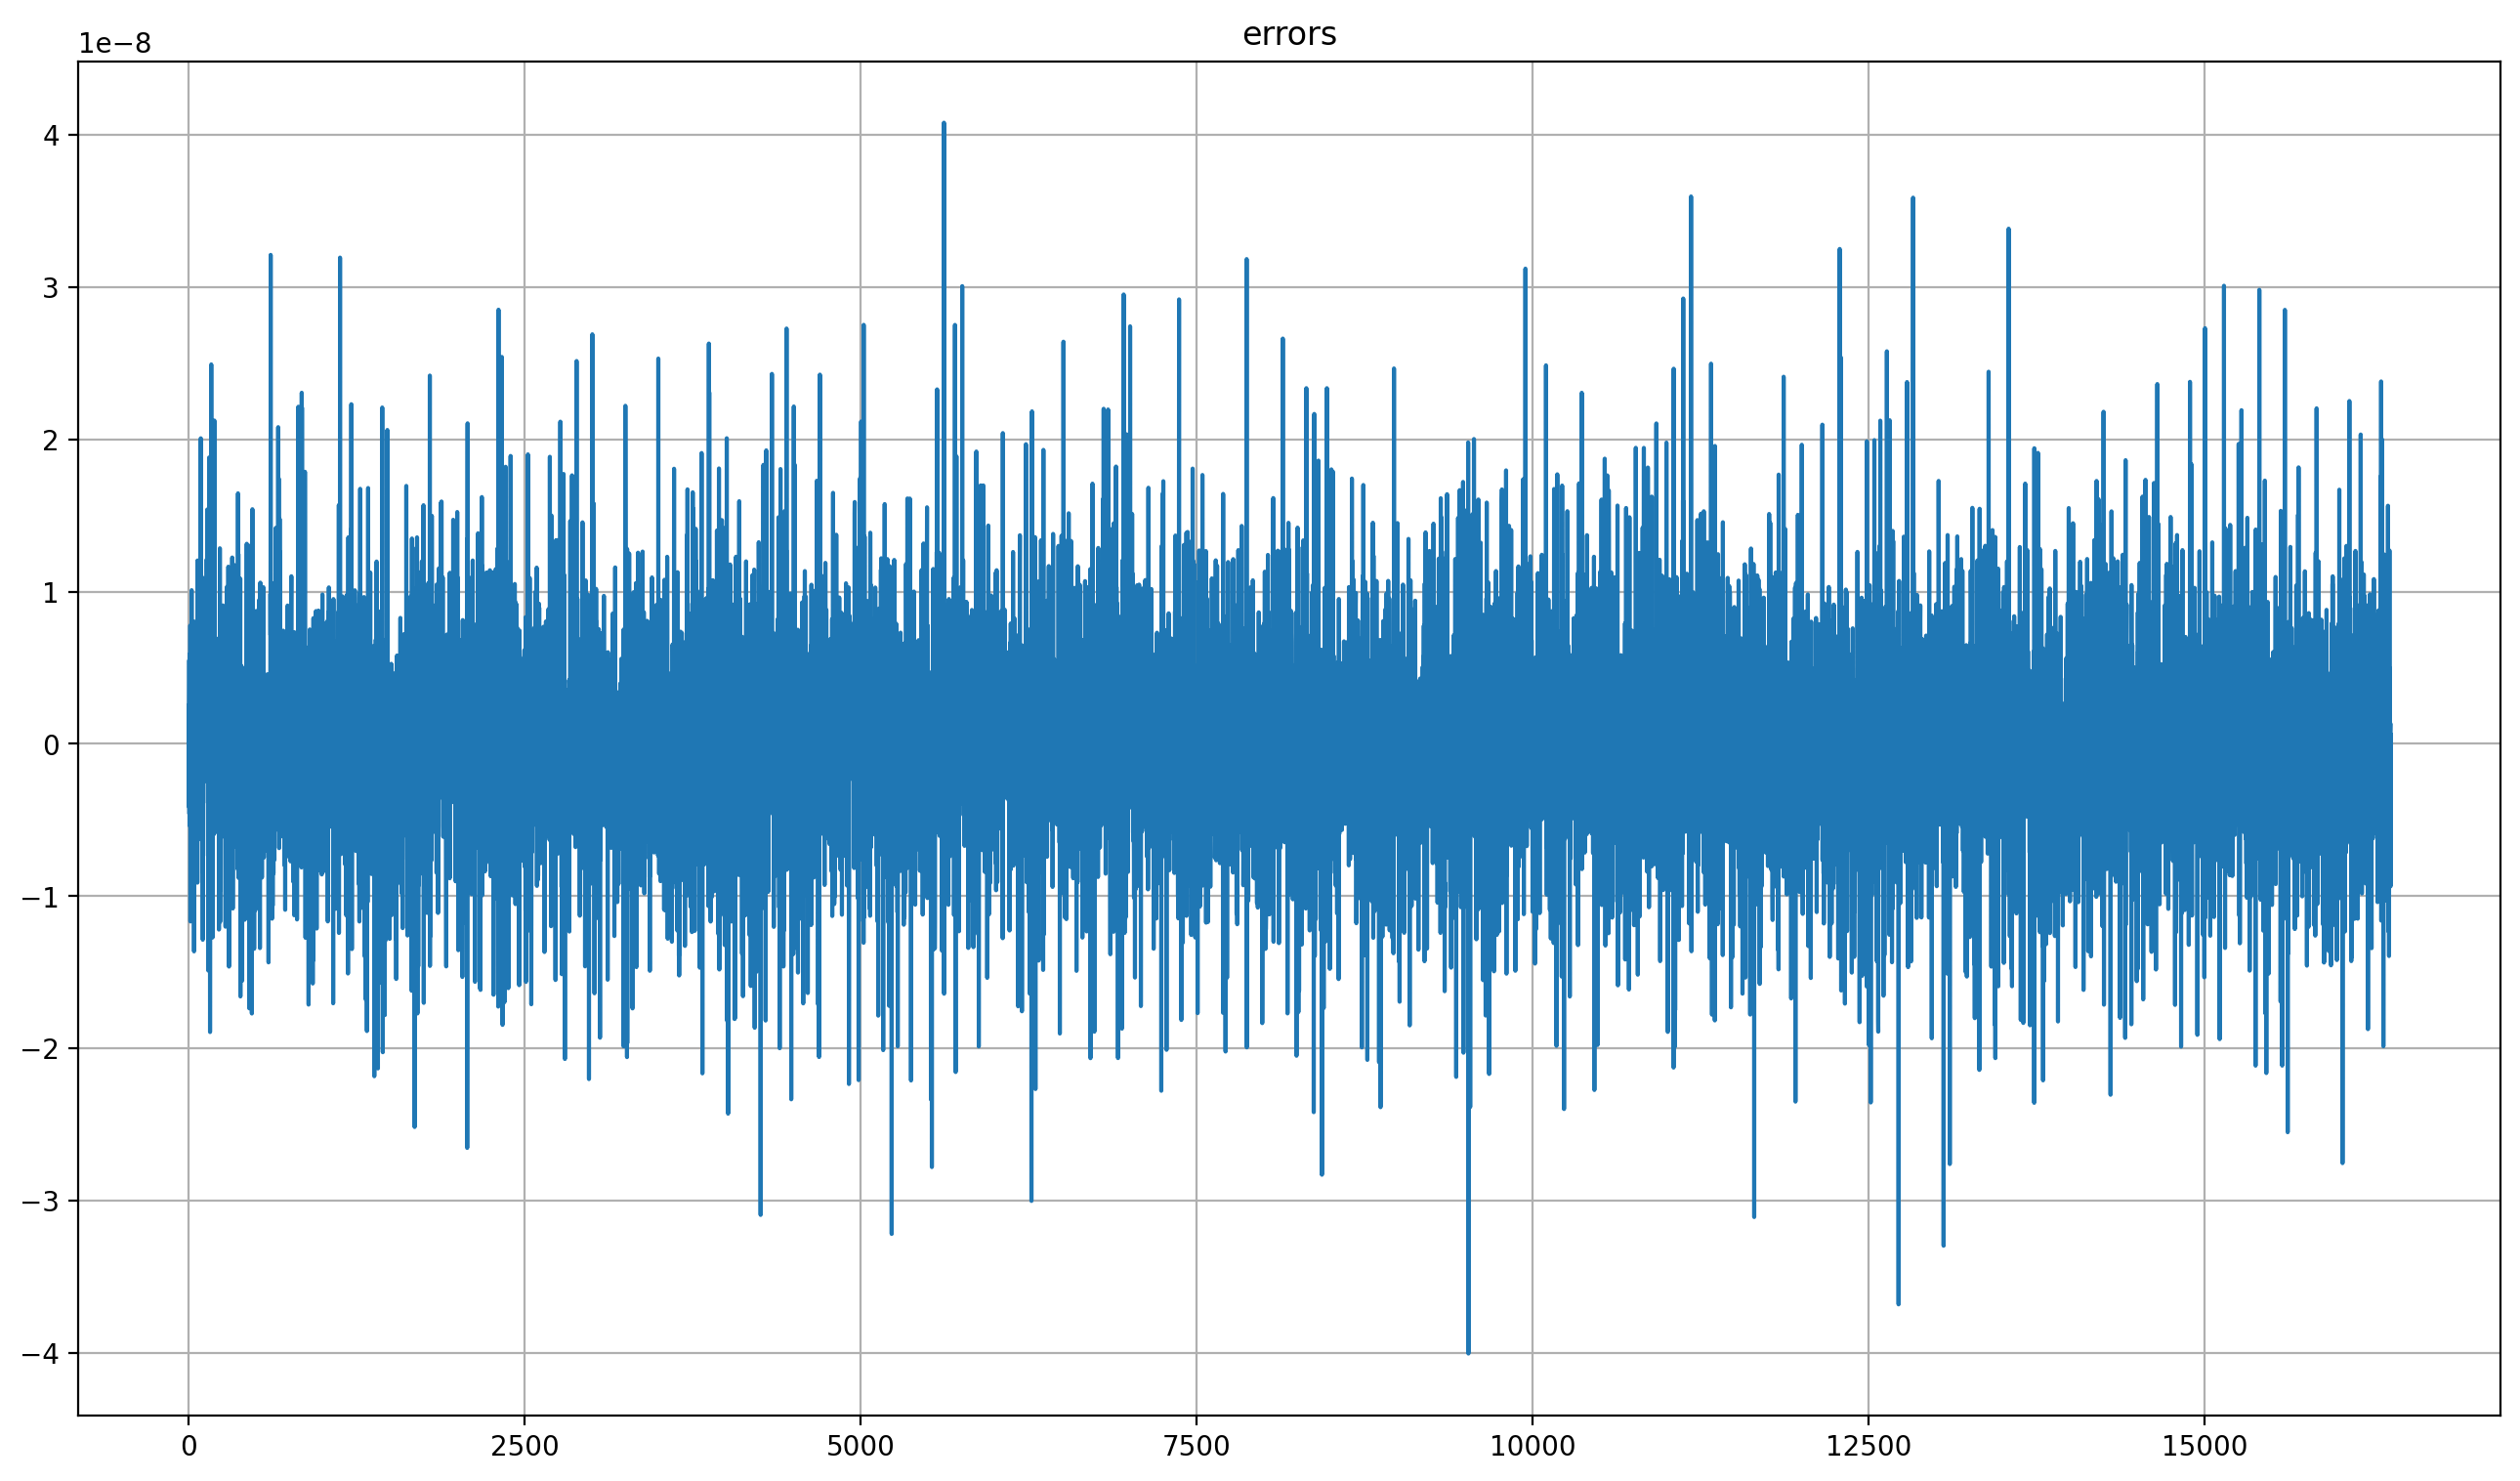

       0.3615631123 |        0.3615631146 |   0.0000000023
       0.0401292240 |        0.0401292265 |   0.0000000026
      -0.4761906922 |       -0.4761906963 |  -0.0000000041
       0.1113483387 |        0.1113483367 |  -0.0000000020
      -0.2573162800 |       -0.2573162745 |   0.0000000055
      -0.0089579233 |       -0.0089579279 |  -0.0000000046
      -0.1453701736 |       -0.1453701719 |   0.0000000016
      -0.3267470917 |       -0.3267470858 |   0.0000000059
       0.7013455936 |        0.7013455929 |  -0.0000000007
       0.1230115013 |        0.1230115067 |   0.0000000054
mean	=	0.000000000082540-0.000000000005136j
std	=	0.000000008037649
max err	=	0.000000047208050
min err	=	0.000000000020288


In [6]:


_min, _max = -1, 1


for level in range(engine.num_levels-1):
    a = engine.example(amin=_min, amax=_max)
    b = engine.example(amin=_min, amax=_max)
    
    ct_a = engine.encorypt(a, pk, level)
    ct_b = engine.encorypt(b, pk, level)

    # cipher text mult
    ct_c = engine.cc_mult(ct_a, ct_b, evk)
    c = a*b
    m_c = engine.decrode(ct_c, sk)

    mult_err = absmax_error(m_c, c)
    print(f""">> At level : {level:2d},
    \t\tmult error was {mult_err:.2e}""")
    
    
check_errors(m_c, c)

----
----
----
----

## 3. Rotation

### 3.1 Galois

In [7]:
params = presets.params["silver"]
engine = fhe.ckks_engine(verbose=True, **params)

sk = engine.create_secret_key()
pk = engine.create_public_key(sk)

gk = engine.create_galois_key(sk)

[2023-11-14 13:22:49.461847] I have received the context:


I have received inputs:
        buffer_bit_length		= 62
        scale_bits			= 40
        logN				= 15
        N				= 32,768
        Number of special primes	= 2
        Number of scales		= 16
        Cache folder			= '/home/hanyul/.pyenv/versions/liberate/lib/python3.11/site-packages/liberate/fhe/cache/resources'
        Security bits			= 128
        Quantum security model		= post_quantum
        Security sampling distribution	= uniform
        Number of message bits		= 60
        In total I will be using '821' bits out of available maximum '829' bits.
        And is it secured?		= True
My RNS primes are [1099510054913, 1099515691009, 1099507695617, 1099516280833, 1099506515969, 1099520606209, 1099504549889, 1099523555329, 1099503894529, 1099527946241, 1099503370241, 1099529060353, 1099498258433, 1099531223041, 1099469684737, 1099532009473, 1152921504606584833, 1152921504598720513, 1152921504597016577].
[2023-11-14 13:22:49.4

At level  0, rotation error was 6.98e-10+5.79e-09j.
At level  1, rotation error was 8.15e-10+5.53e-09j.
At level  2, rotation error was 7.28e-10+5.47e-09j.
At level  3, rotation error was 8.15e-10+5.59e-09j.
At level  4, rotation error was 7.57e-10+5.56e-09j.
At level  5, rotation error was 6.98e-10+5.82e-09j.
At level  6, rotation error was 8.15e-10+5.68e-09j.
At level  7, rotation error was 6.98e-10+5.27e-09j.
At level  8, rotation error was 6.69e-10+5.59e-09j.
At level  9, rotation error was 6.18e-10+6.00e-09j.
At level 10, rotation error was 6.40e-10+5.12e-09j.
At level 11, rotation error was 8.73e-10+5.76e-09j.
At level 12, rotation error was 6.98e-10+5.68e-09j.
At level 13, rotation error was 6.98e-10+5.27e-09j.
At level 14, rotation error was 7.57e-10+5.21e-09j.


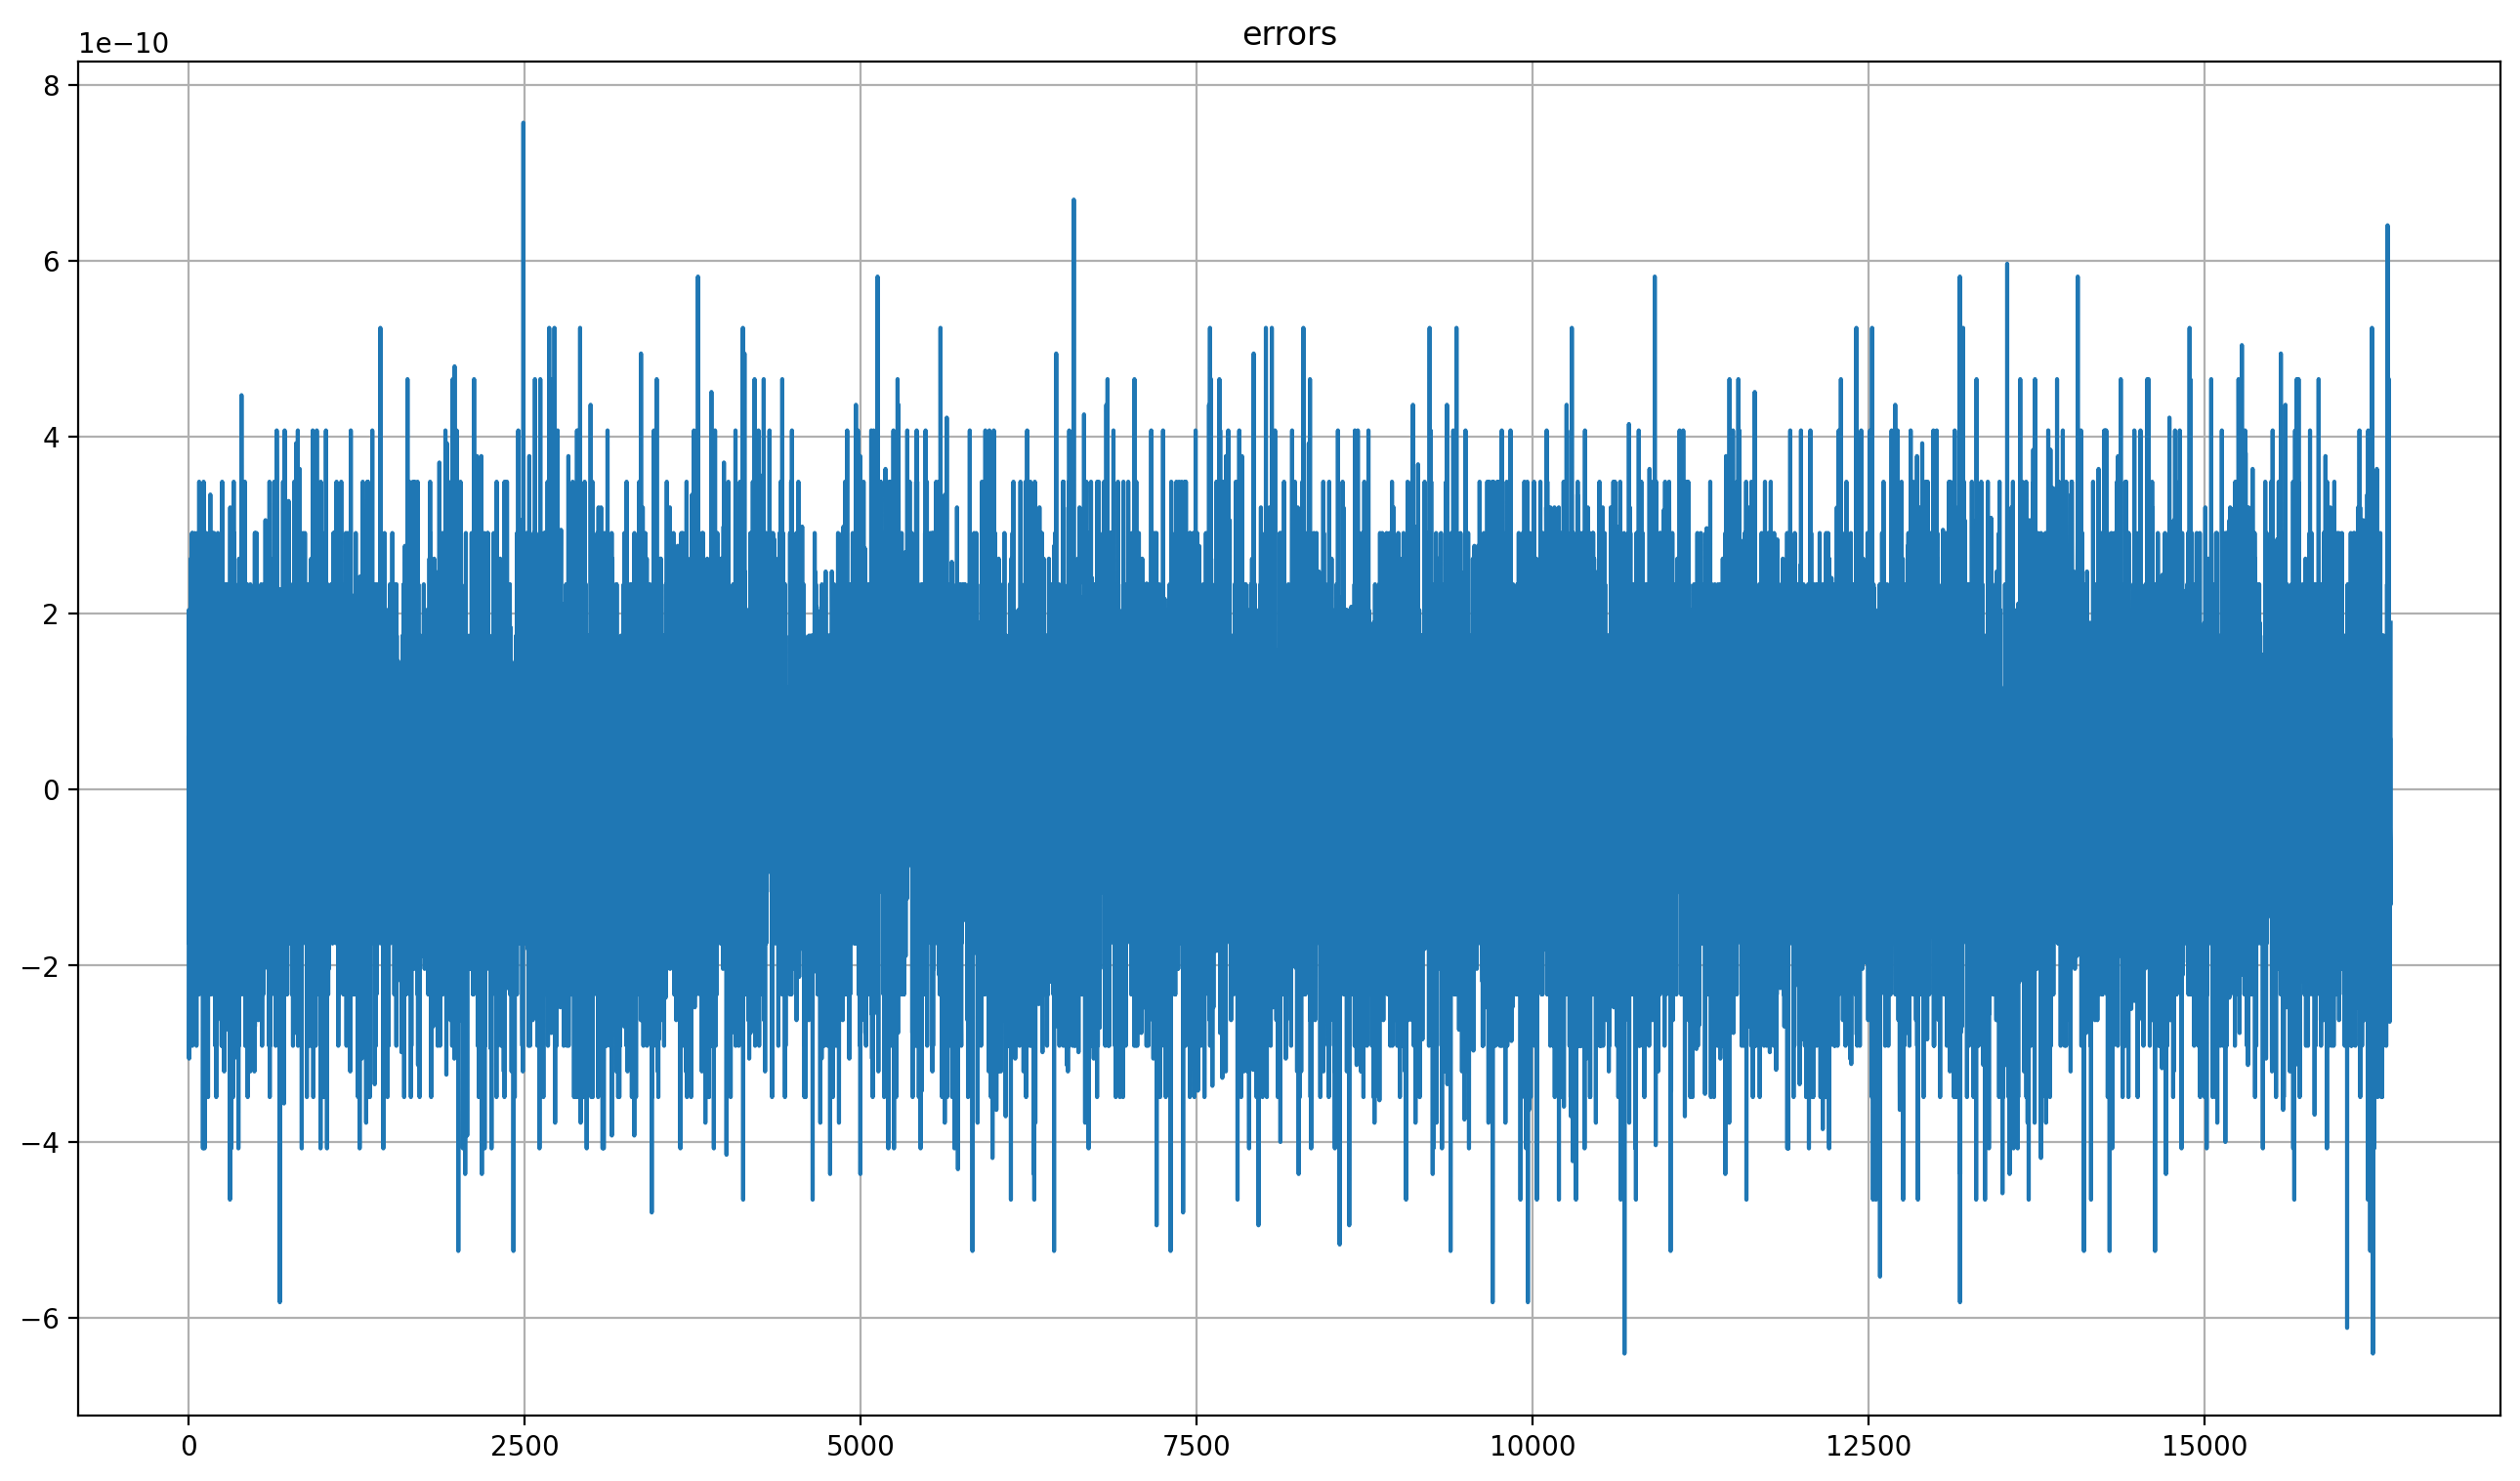

  407272.7357667281 |   407272.7357667281 |   0.0000000001
 -430939.2647165584 |  -430939.2647165586 |  -0.0000000002
 -141880.1132990345 |  -141880.1132990343 |   0.0000000002
    2470.8872657220 |     2470.8872657220 |   0.0000000000
  104619.8157574718 |   104619.8157574715 |  -0.0000000003
 -179615.6433004717 |  -179615.6433004719 |  -0.0000000001
   28542.1800702019 |    28542.1800702018 |  -0.0000000001
 -396401.4979838843 |  -396401.4979838844 |  -0.0000000001
 -188854.1943514692 |  -188854.1943514692 |  -0.0000000000
    9832.3451293169 |     9832.3451293170 |   0.0000000001
mean	=	0.000000000004891-0.000000000000749j
std	=	0.000000000234242
max err	=	0.000000005209911
min err	=	0.000000000000000


In [8]:
delta = -123456
m = engine.example()
m_true_rotated = np.roll(m, delta)
for level in range(engine.num_levels-1):
    ct_a = engine.encorypt(m, pk, level)

    # rotate
    ct_rotated = engine.rotate_galois(ct_a, gk, delta=delta)
    
    m_c = engine.decrode(ct_rotated, sk)

    rot_err = absmax_error(m_c, m_true_rotated)
    print(f"At level {level:2d}, rotation error was {rot_err:.2e}.")

check_errors(m_c, m_true_rotated)

### 3.2 rotate single

In [9]:
params = presets.params["silver"]
engine = fhe.ckks_engine(verbose=True, **params)

sk = engine.create_secret_key()
pk = engine.create_public_key(sk)

# Generate rotation key
delta = np.random.randint(-engine.num_slots, engine.num_slots)
rotk = engine.create_rotation_key(sk, delta=delta)

[2023-11-14 13:22:51.184942] I have received the context:


I have received inputs:
        buffer_bit_length		= 62
        scale_bits			= 40
        logN				= 15
        N				= 32,768
        Number of special primes	= 2
        Number of scales		= 16
        Cache folder			= '/home/hanyul/.pyenv/versions/liberate/lib/python3.11/site-packages/liberate/fhe/cache/resources'
        Security bits			= 128
        Quantum security model		= post_quantum
        Security sampling distribution	= uniform
        Number of message bits		= 60
        In total I will be using '821' bits out of available maximum '829' bits.
        And is it secured?		= True
My RNS primes are [1099510054913, 1099515691009, 1099507695617, 1099516280833, 1099506515969, 1099520606209, 1099504549889, 1099523555329, 1099503894529, 1099527946241, 1099503370241, 1099529060353, 1099498258433, 1099531223041, 1099469684737, 1099532009473, 1152921504606584833, 1152921504598720513, 1152921504597016577].
[2023-11-14 13:22:51.1

At level  0, rotation error was 2.95e-10+7.75e-09j.
At level  1, rotation error was 2.63e-10+7.62e-09j.
At level  2, rotation error was 2.55e-10+7.35e-09j.
At level  3, rotation error was 2.44e-10+7.54e-09j.
At level  4, rotation error was 2.32e-10+7.53e-09j.
At level  5, rotation error was 2.40e-10+7.69e-09j.
At level  6, rotation error was 2.36e-10+7.63e-09j.
At level  7, rotation error was 2.55e-10+7.36e-09j.
At level  8, rotation error was 2.69e-10+7.62e-09j.
At level  9, rotation error was 2.42e-10+7.88e-09j.
At level 10, rotation error was 2.73e-10+7.20e-09j.
At level 11, rotation error was 2.65e-10+7.45e-09j.
At level 12, rotation error was 2.51e-10+7.53e-09j.
At level 13, rotation error was 2.73e-10+7.30e-09j.
At level 14, rotation error was 2.71e-10+7.33e-09j.


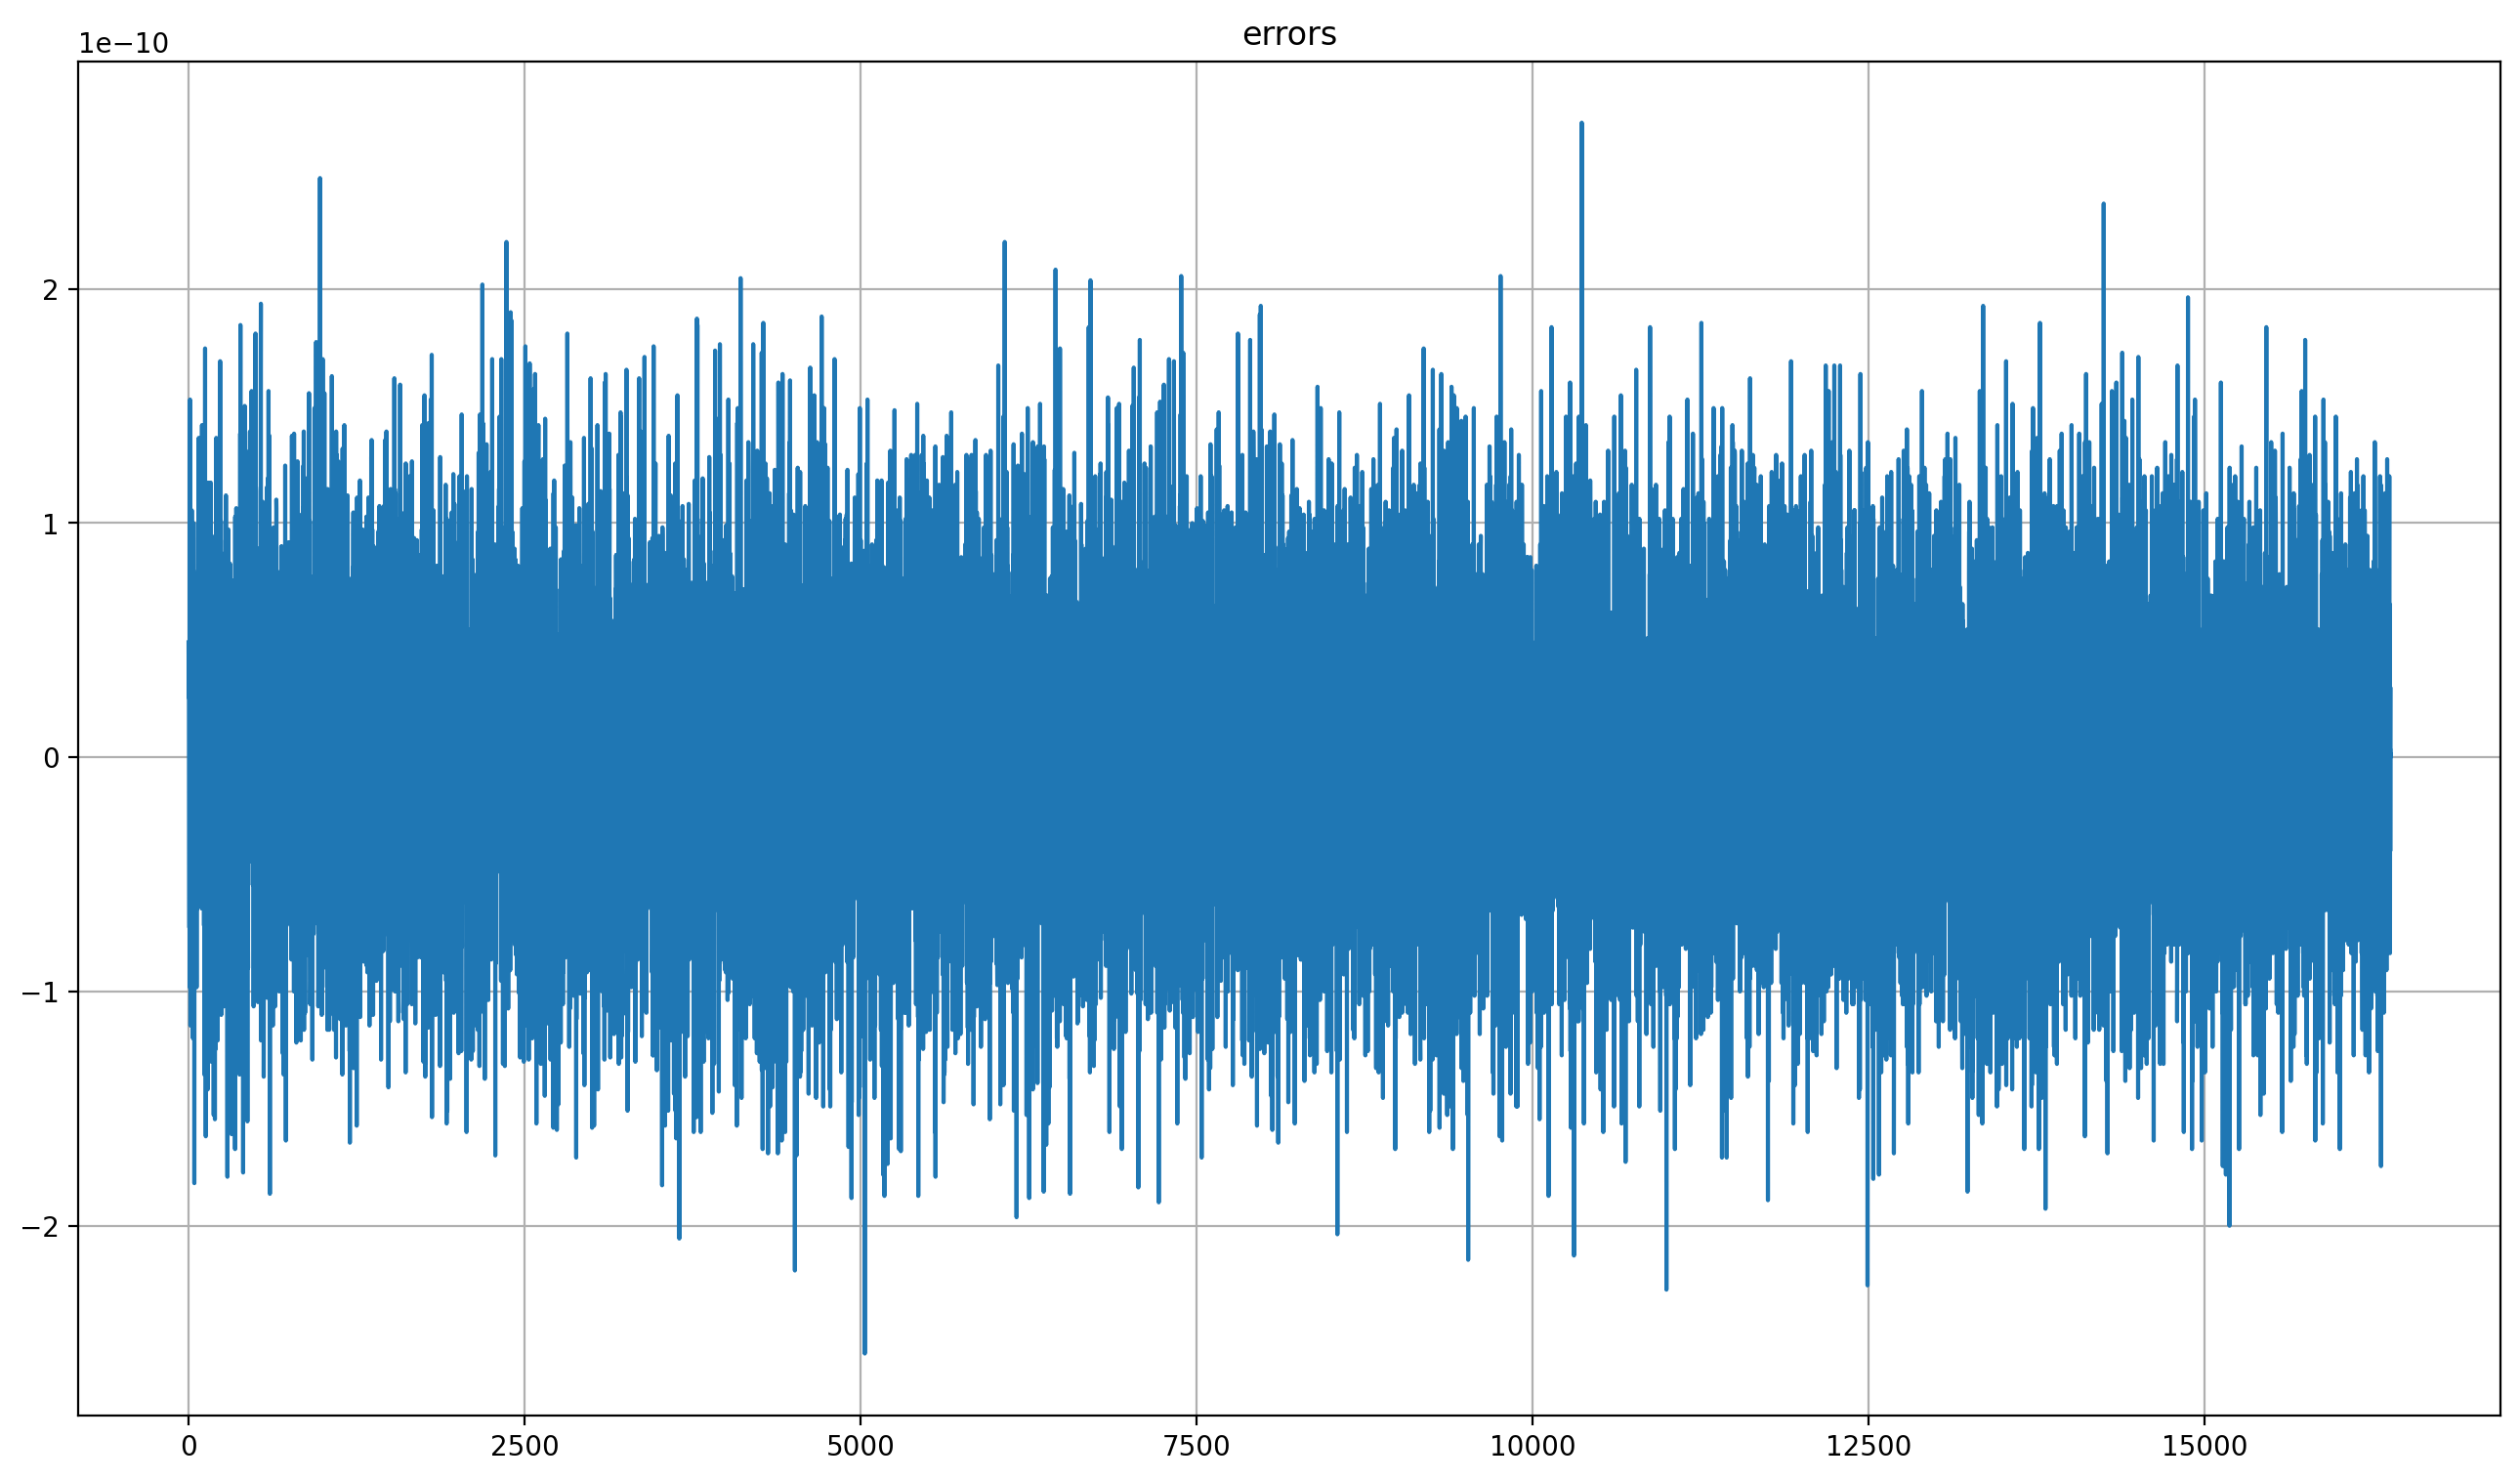

   16288.0000000000 |    16288.0000000000 |   0.0000000000
   16289.0000000000 |    16289.0000000000 |   0.0000000000
   16290.0000000000 |    16290.0000000000 |   0.0000000000
   16291.0000000000 |    16291.0000000000 |   0.0000000000
   16292.0000000000 |    16292.0000000000 |  -0.0000000000
   16293.0000000000 |    16293.0000000000 |  -0.0000000000
   16294.0000000001 |    16294.0000000000 |  -0.0000000001
   16295.0000000000 |    16295.0000000000 |   0.0000000000
   16296.0000000000 |    16296.0000000000 |   0.0000000000
   16297.0000000001 |    16297.0000000000 |  -0.0000000001
mean	=	-0.000000000000005+0.000000000002151j
std	=	0.000000000110425
max err	=	0.000000007330692
min err	=	0.000000000000000


In [10]:
# m = engine.example()
m = np.arange(0, engine.ctx.N//2) + np.arange(0, engine.ctx.N//2) * 1j
m_true_rotated = np.roll(m, delta)

for level in range(engine.num_levels-1):
    ct_a = engine.encodecrypt(m, pk, level)
    ct_rotated = engine.rotate_single(ct_a, rotk)
    m_rotated = engine.decryptcode(ct_rotated, sk)

    err_single_rotate = absmax_error(m_rotated, m_true_rotated)

    print(f"At level {level:2d}, rotation error was {err_single_rotate:.2e}.")

check_errors(m_rotated, m_true_rotated)

## 4. level_up

In [11]:
params = presets.params["silver"]
engine = fhe.ckks_engine(verbose=True, **params)

secret_key = engine.create_secret_key()
public_key = engine.create_public_key(sk=secret_key)

[2023-11-14 13:22:52.357534] I have received the context:


I have received inputs:
        buffer_bit_length		= 62
        scale_bits			= 40
        logN				= 15
        N				= 32,768
        Number of special primes	= 2
        Number of scales		= 16
        Cache folder			= '/home/hanyul/.pyenv/versions/liberate/lib/python3.11/site-packages/liberate/fhe/cache/resources'
        Security bits			= 128
        Quantum security model		= post_quantum
        Security sampling distribution	= uniform
        Number of message bits		= 60
        In total I will be using '821' bits out of available maximum '829' bits.
        And is it secured?		= True
My RNS primes are [1099510054913, 1099515691009, 1099507695617, 1099516280833, 1099506515969, 1099520606209, 1099504549889, 1099523555329, 1099503894529, 1099527946241, 1099503370241, 1099529060353, 1099498258433, 1099531223041, 1099469684737, 1099532009473, 1152921504606584833, 1152921504598720513, 1152921504597016577].
[2023-11-14 13:22:52.3

From level  0 level 15, level up error was 3.73e-08+2.92e-08j.
From level  1 level 15, level up error was 3.81e-08+2.99e-08j.
From level  2 level  7, level up error was 3.03e-08+3.63e-08j.
From level  3 level 13, level up error was 3.24e-08+3.91e-08j.
From level  4 level  7, level up error was 3.06e-08+4.34e-08j.
From level  5 level 10, level up error was 3.36e-08+3.14e-08j.
From level  6 level  8, level up error was 4.49e-08+3.62e-08j.
From level  7 level 10, level up error was 3.63e-08+3.88e-08j.
From level  8 level 12, level up error was 3.42e-08+3.03e-08j.
From level  9 level 15, level up error was 3.93e-08+3.60e-08j.
From level 10 level 11, level up error was 3.30e-08+3.26e-08j.
From level 11 level 14, level up error was 3.37e-08+3.21e-08j.
From level 12 level 13, level up error was 3.84e-08+4.08e-08j.
From level 13 level 15, level up error was 3.40e-08+4.64e-08j.
From level 14 level 15, level up error was 3.25e-08+3.94e-08j.


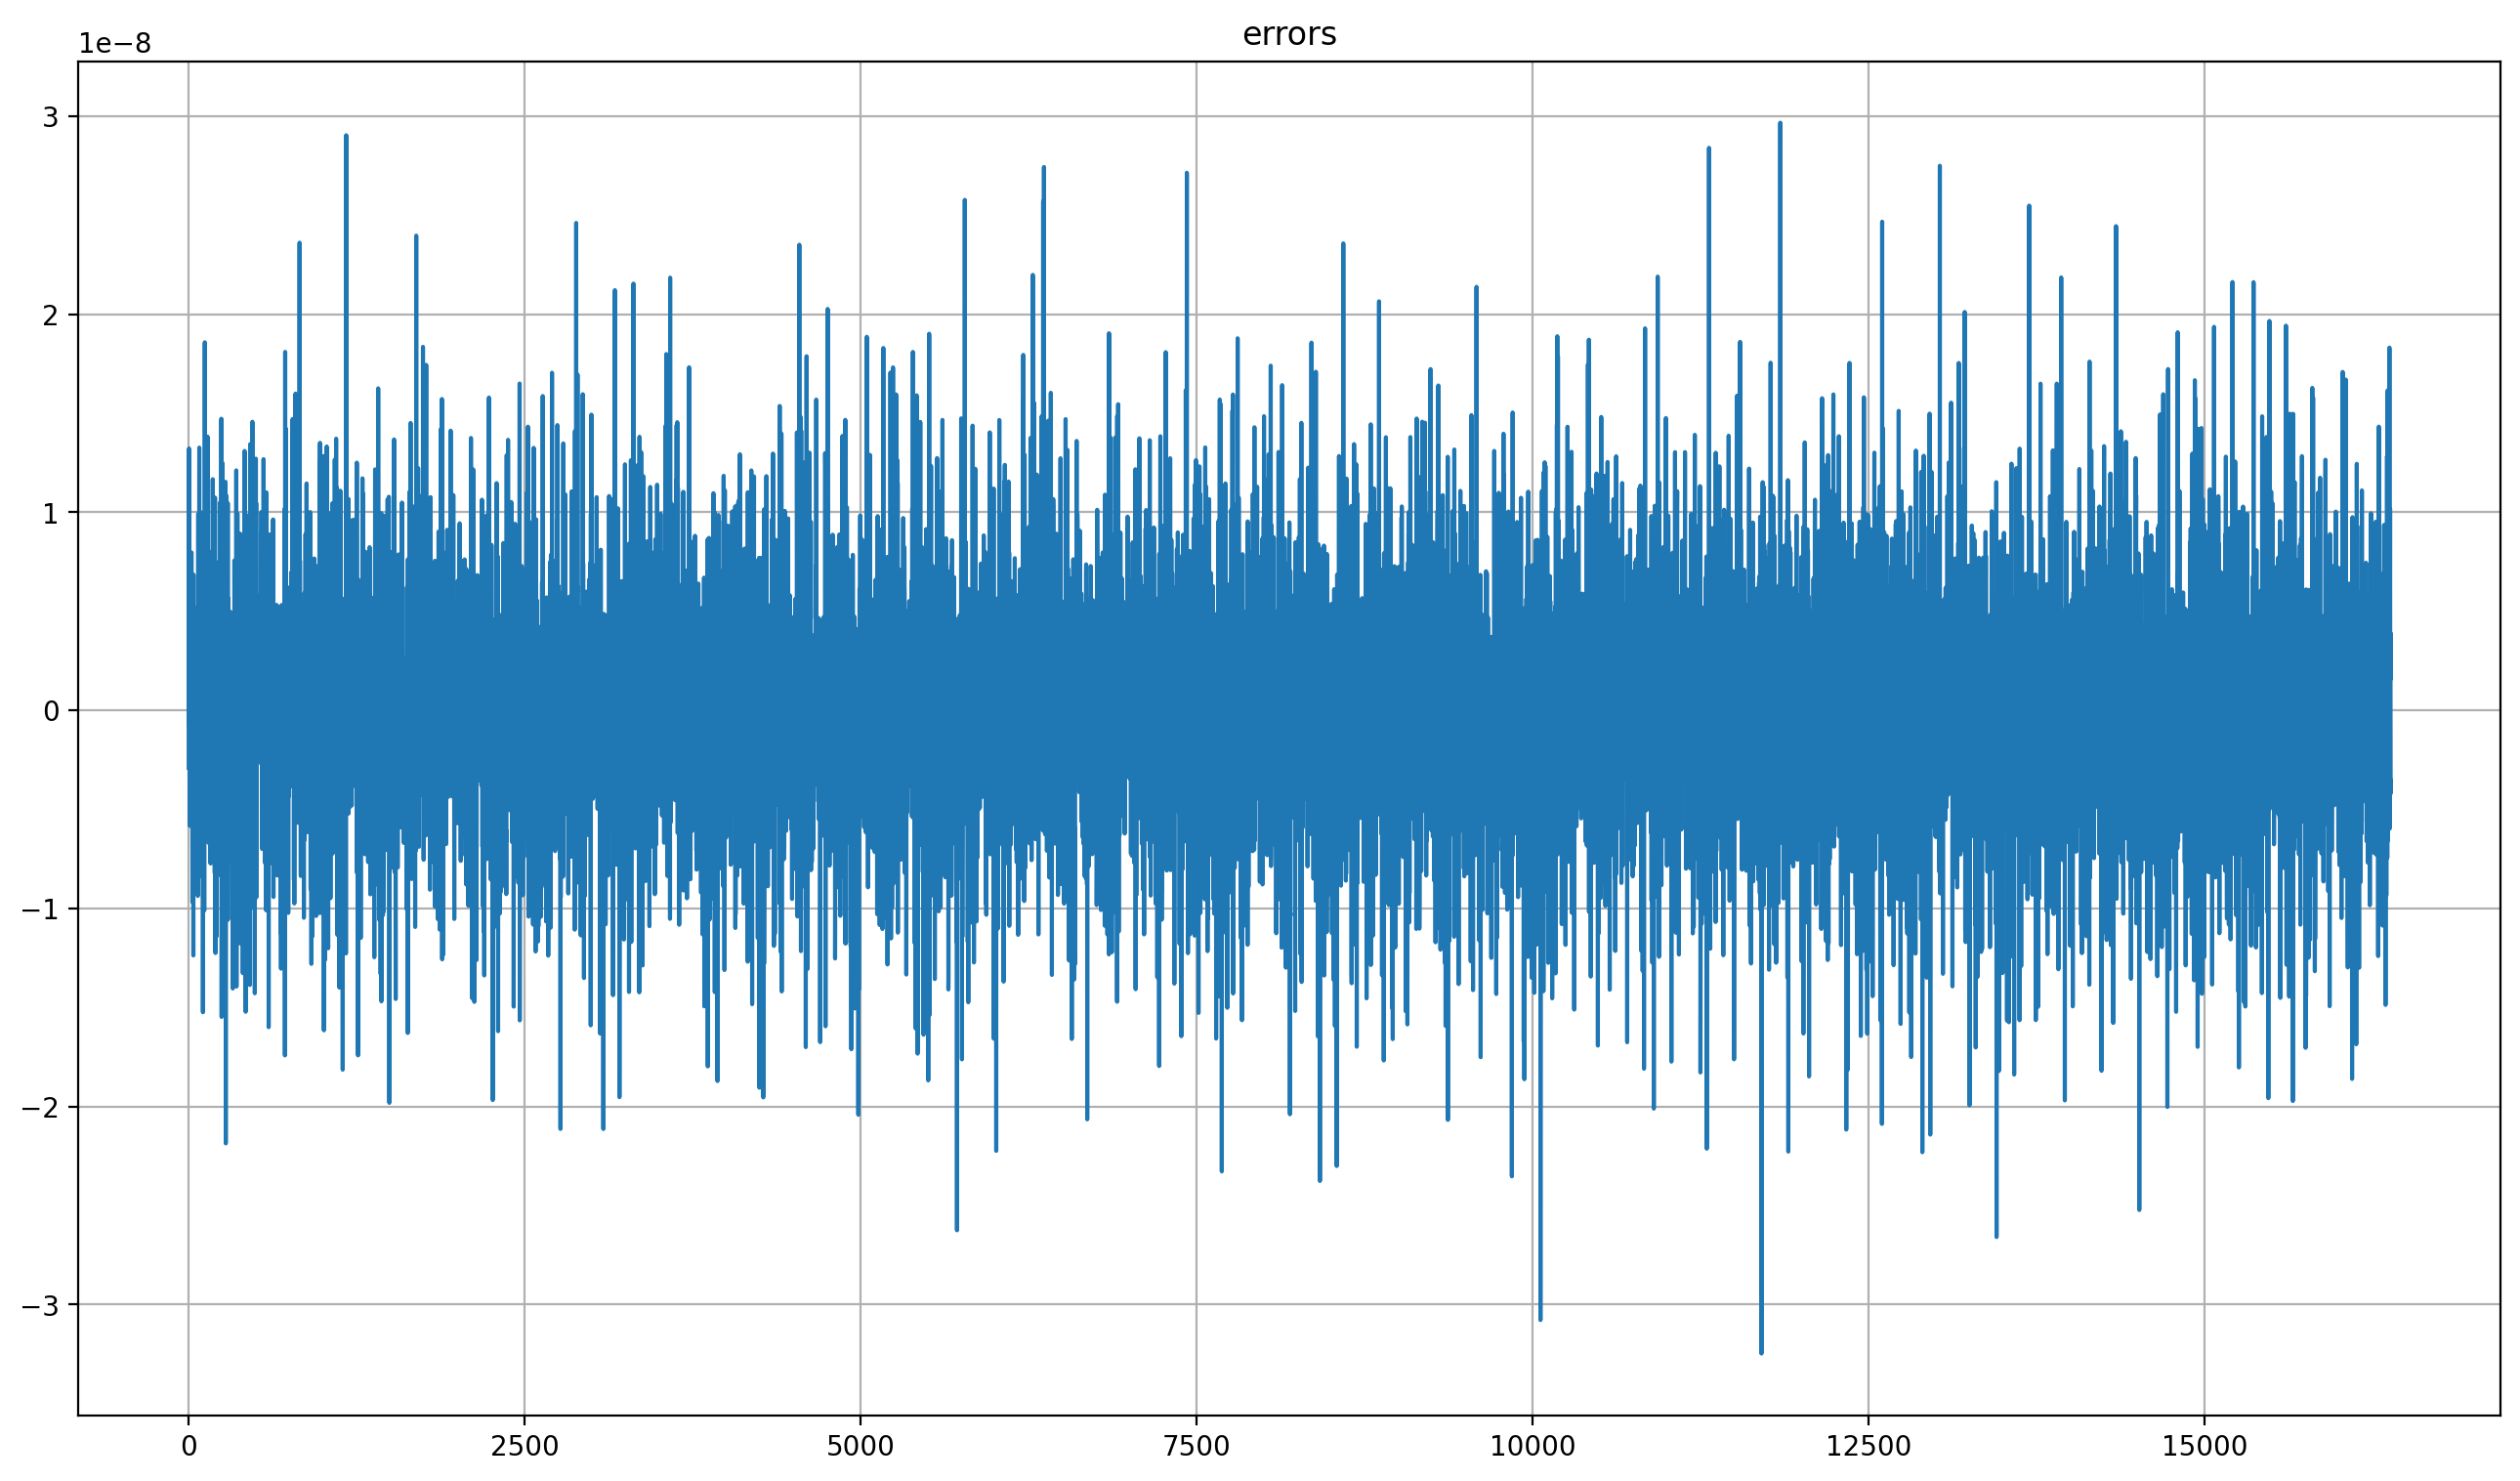

       0.0897022546 |        0.0897022517 |  -0.0000000029
      -0.3166497134 |       -0.3166497006 |   0.0000000128
      -0.3039640284 |       -0.3039640291 |  -0.0000000007
      -0.6350169448 |       -0.6350169316 |   0.0000000132
       0.1124185663 |        0.1124185665 |   0.0000000002
      -0.9747981445 |       -0.9747981453 |  -0.0000000008
      -0.6672846839 |       -0.6672846845 |  -0.0000000006
      -0.4554025629 |       -0.4554025595 |   0.0000000034
       0.3594915931 |        0.3594915964 |   0.0000000033
      -0.4665767394 |       -0.4665767452 |  -0.0000000058
mean	=	-0.000000000003645+0.000000000007210j
std	=	0.000000007039614
max err	=	0.000000041257413
min err	=	0.000000000035935


In [12]:
# generate example data
a = engine.example(amin=-1, amax=1)

for level in range(engine.num_levels-1):
    # pt = engine.encode(m=a, level=level)
    # ct = engine.encrypt(pt, public_key, level=0)
    ct = engine.encorypt(m=a, pk=public_key, level=0)

    # level up
    dst_level = np.random.randint(level+1, engine.num_levels)
    ct_ = engine.level_up(ct=ct, dst_level=dst_level)
    
    # pt_ = engine.decrypt(ct=ct_, sk=secret_key)
    # a_ = engine.decode(pt_, level=level)
    a_ = engine.decrode(ct_, sk=secret_key)
    err_level_up = absmax_error(a_, a)
    print(f"From level {level:2d} level {dst_level:2d}, level up error was {err_level_up:.2e}.")

check_errors(a_, a)